In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
data=pd.read_csv("heart.csv")
data.tail()
data.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [38]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [39]:
data=data.drop(50,axis=0)
data=data.drop(94,axis=0)
data=data.drop(160,axis=0)
data=data.drop(165,axis=0)
data=data.drop(166,axis=0)
data=data.drop(253,axis=0)
data=data.drop(283,axis=0)

In [40]:
data.count()

age         296
sex         296
cp          296
trestbps    296
chol        296
fbs         296
restecg     296
thalach     296
exang       296
oldpeak     296
slope       296
ca          296
thal        296
target      296
dtype: int64

In [41]:
X=data.drop('target',axis=1)
y=data['target']

In [42]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
sv=classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



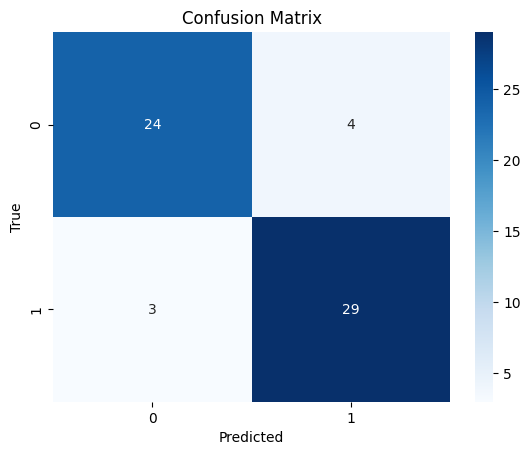

In [110]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [112]:
def predict_custom_input(features):
    input_df = pd.DataFrame([features], columns=X.columns)
    prediction = classifier.predict(input_df)
    return prediction[0]  



#custom_input = [57, 0, 1, 130,236,0,0,174,0,0,1,1,2]
custom_input = [56,1,3,120,193,0,0,162,0,1.9,1,0,3]  


predicted_class = predict_custom_input(custom_input)
if predicted_class==0:
    print("No Disease")
else:
    print("Disease")

Disease


In [114]:
import pickle
pickle.dump(sv, open('heart.pkl', 'wb'))

In [88]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        28
           1       0.91      0.66      0.76        32

    accuracy                           0.78        60
   macro avg       0.81      0.79      0.78        60
weighted avg       0.81      0.78      0.78        60



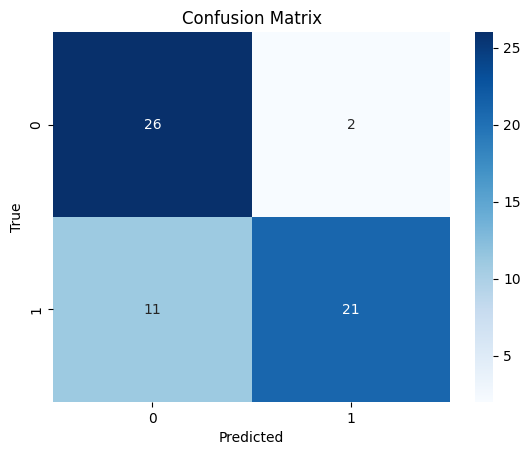

In [96]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
y_predict = knn_classifier.predict(X_test)
print(classification_report(y_test, y_predict))

conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [104]:
def predict_custom_input(features):
    input_df = pd.DataFrame([features], columns=X.columns)
    prediction = knn_classifier.predict(input_df)
    return prediction[0]  



custom_input = [57, 0, 1, 130,236,0,0,174,0,0,1,1,2]
#custom_input = [56,1,3,120,193,0,0,162,0,1.9,1,0,3]  


predicted_class = predict_custom_input(custom_input)
if predicted_class==0:
    print("No Disease")
else:
    print("Disease")

No Disease
